In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tcr_file = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_TCR/processed/cellranger_out/TCR_VDJ/outs/all_contig_annotations.csv"
tcr_file = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_TCR/processed/gem_filtration_lists/ready_for_use.lst"
mhc_dir = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/exp3_MHC/processed/tmp/"
figs = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/"

In [3]:
tcr_barcodes = np.sort(np.loadtxt(tcr_file, dtype=np.str))

In [4]:
tcr_barcodes

array(['AAACCTGAGAATTGTG-1', 'AAACCTGAGACTAGGC-1', 'AAACCTGAGAGTCTGG-1',
       ..., 'TTTGTCATCAACGGCC-1', 'TTTGTCATCGACAGCC-1',
       'TTTGTCATCTGCGGCA-1'], dtype='<U18')

In [5]:
#df = pd.read_csv(tcr_file, header=0)

In [6]:
#tcr_barcodes = np.sort(df.barcode.unique())

intersection_types = dict()
filtering_types = ['raw', 'grep_anneal', 'grep_anneal_min_100bp']

for ft in filtering_types:
    pmhc_barcodes = np.loadtxt(mhc_dir + "listing_GEMs_from_" + ft + "/unique_gems.lst", dtype=np.str)
    intersection_types[ft] = [len(np.intersect1d(tcr_barcodes, pmhc_barcodes, assume_unique=True))]
    
    for threshold in range(2, 10, 1):
        pmhc_barcodes = np.loadtxt(mhc_dir + "listing_GEMs_from_" + ft + "/unique_gems_min_" + str(threshold) + ".lst", dtype=np.str)
        intersection_types[ft].append(len(np.intersect1d(tcr_barcodes, pmhc_barcodes, assume_unique=True)))

    for threshold in range(10, 110, 10):
        pmhc_barcodes = np.loadtxt(mhc_dir + "listing_GEMs_from_" + ft + "/unique_gems_min_" + str(threshold) + ".lst", dtype=np.str)
        intersection_types[ft].append(len(np.intersect1d(tcr_barcodes, pmhc_barcodes, assume_unique=True)))



In [7]:
print(intersection_types)

{'raw': [113189, 5990, 5981, 5975, 5969, 5965, 5958, 5955, 5951, 5949, 5922, 5907, 5900, 5887, 5871, 5859, 5846, 5819, 5796], 'grep_anneal': [11276, 2073, 1884, 1845, 1831, 1827, 1822, 1812, 1806, 1799, 1633, 1288, 979, 833, 658, 513, 386, 319, 273], 'grep_anneal_min_100bp': [10614, 1939, 1743, 1704, 1691, 1688, 1682, 1680, 1674, 1672, 1565, 1226, 932, 791, 607, 470, 359, 298, 250]}


Number of fully annotated TCRs:  5993
raw
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[113189, 5990, 5981, 5975, 5969, 5965, 5958, 5955, 5951, 5949, 5922, 5907, 5900, 5887, 5871, 5859, 5846, 5819, 5796]


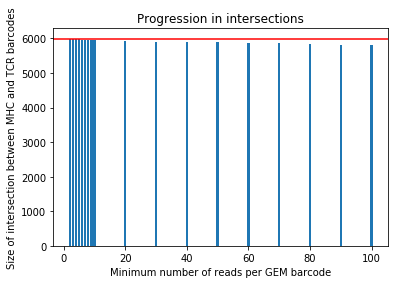

grep_anneal
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[11276, 2073, 1884, 1845, 1831, 1827, 1822, 1812, 1806, 1799, 1633, 1288, 979, 833, 658, 513, 386, 319, 273]


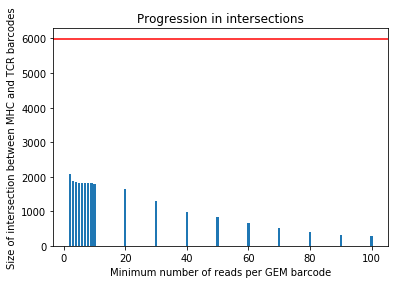

grep_anneal_min_100bp
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[10614, 1939, 1743, 1704, 1691, 1688, 1682, 1680, 1674, 1672, 1565, 1226, 932, 791, 607, 470, 359, 298, 250]


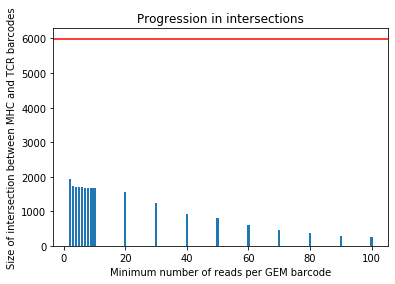

In [16]:
print("Number of fully annotated TCRs: ", str(len(tcr_barcodes)))
for ft in filtering_types:
    x = list(range(2, 10, 1)) + list(range(10, 110, 10))
    print(ft)
    print([0] + x)
    print(intersection_types[ft])
    plt.bar(x, height=intersection_types[ft][1:])
    plt.axhline(y=len(tcr_barcodes), color='r')
    plt.xlabel("Minimum number of reads per GEM barcode")
    plt.ylabel("Size of intersection between MHC and TCR barcodes")
    plt.title("Progression in intersections")
    plt.savefig(figs + "tcr_intersection_with_mhc_" + ft + ".pdf")
    plt.show()

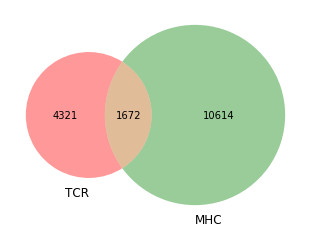

In [14]:
from matplotlib_venn import venn2
c = intersection_types['grep_anneal_min_100bp'][9]
a = len(tcr_barcodes) - c
b = intersection_types['grep_anneal_min_100bp'][0]
# Make the diagram
venn2(subsets = (a, b, c), set_labels = ('TCR', 'MHC'))
plt.savefig(figs + "tcr-mhc_raw_venn.pdf")
#plt.title("Intersection supported by >10 reads")
plt.show()